# 1. Capstone2 (Data Wrangling)<a id='2.1_Contents'></a>
1. Data imports
2. Data loading
3. Data definition and preparation

## Data imports

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from termcolor import colored

## Data loading

In [2]:
os.chdir(r"C:\Springboard_Materials\Capstone 2\data")
print(os.listdir())

['BTC-USD.csv', 'CPI.csv', 'Gold.csv', 'S&P500.csv']


In [3]:
bitcoin_prices=pd.read_csv(r"BTC-USD.csv", index_col=['Date'], parse_dates=['Date'])
display(bitcoin_prices.head())
print(bitcoin_prices.info())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008.0
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992.0
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000.0
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984.0
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2191 entries, 2017-01-01 to 2022-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2191 non-null   float64
 1   High       2191 non-null   float64
 2   Low        2191 non-null   float64
 3   Close      2191 non-null   float64
 4   Adj Close  2191 non-null   float64
 5   Volume     2191 non-null   float64
dtypes: float64(6)
memory usage: 119.8 KB
None


In [4]:
sp500_prices=pd.read_csv(r"S&P500.csv", parse_dates=['Date'], index_col=['Date'])
display(sp500_prices.head())
print(sp500_prices.info())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,"2,251.57","2,263.88","2,245.13","2,257.83","2,257.83","3,773,010,000"
2017-01-04,"2,261.60","2,272.82","2,261.60","2,270.75","2,270.75","3,768,890,000"
2017-01-05,"2,268.18","2,271.50","2,260.45","2,269.00","2,269.00","3,785,080,000"
2017-01-06,"2,271.14","2,282.10","2,264.06","2,276.98","2,276.98","3,342,080,000"
2017-01-09,"2,273.59","2,275.49","2,268.90","2,268.90","2,268.90","3,219,730,000"


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1509 entries, 2017-01-03 to 2022-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Open       1509 non-null   object
 1   High       1509 non-null   object
 2   Low        1509 non-null   object
 3   Close      1509 non-null   object
 4   Adj Close  1509 non-null   object
 5   Volume     1509 non-null   object
dtypes: object(6)
memory usage: 82.5+ KB
None


In [5]:
sp500_prices.replace(',', '', regex=True, inplace=True)

In [6]:
# All data should be numeric
for col in sp500_prices.columns:
    sp500_prices[col]=sp500_prices[col].astype('float64')
sp500_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1509 entries, 2017-01-03 to 2022-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1509 non-null   float64
 1   High       1509 non-null   float64
 2   Low        1509 non-null   float64
 3   Close      1509 non-null   float64
 4   Adj Close  1509 non-null   float64
 5   Volume     1509 non-null   float64
dtypes: float64(6)
memory usage: 82.5 KB


In [7]:
cpi=pd.read_csv(r"CPI.csv", header=1)
cpi.dropna(axis=1, how='all', inplace=True)
cpi.drop(['Dec-Dec', 'Avg-Avg', 'Avg'], axis=1, inplace=True)
display(cpi.head())

,Year,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec
0,1913,9.8,9.8,9.8,9.8,9.7,9.8,9.9,9.9,10.0,10.0,10.1,10.0
1,1914,10.0,9.9,9.9,9.8,9.9,9.9,10.0,10.2,10.2,10.1,10.2,10.1
2,1915,10.1,10.0,9.9,10.0,10.1,10.1,10.1,10.1,10.1,10.2,10.3,10.3
3,1916,10.4,10.4,10.5,10.6,10.7,10.8,10.8,10.9,11.1,11.3,11.5,11.6
4,1917,11.7,12.0,12.0,12.6,12.8,13.0,12.8,13.0,13.3,13.5,13.5,13.7


In [8]:
cpi=cpi.loc[np.logical_and(cpi.Year>2016, cpi.Year<2023)]
cpi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 104 to 109
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    6 non-null      int64  
 1   Jan     6 non-null      float64
 2   Feb     6 non-null      object 
 3   Mar     6 non-null      float64
 4   Apr     6 non-null      float64
 5   May     6 non-null      float64
 6   June    6 non-null      float64
 7   July    6 non-null      float64
 8   Aug     6 non-null      float64
 9   Sep     6 non-null      float64
 10  Oct     6 non-null      float64
 11  Nov     6 non-null      float64
 12  Dec     6 non-null      float64
dtypes: float64(11), int64(1), object(1)
memory usage: 672.0+ bytes


In [9]:
cpi.Feb=cpi.Feb.astype('float64')

In [10]:
cpi=cpi.melt(id_vars='Year', var_name='Month', value_name='cpi')

In [11]:
cpi.Year=cpi.Year.astype(str)
cpi['Date']=cpi.Month+" "+cpi.Year
cpi.drop(['Year', 'Month'], axis=1, inplace=True)
cpi['Date']= pd.to_datetime(cpi.Date)
cpi.set_index('Date', inplace=True)
display(cpi.head())
print(cpi.info())

,cpi
Date,
2017-01-01,242.839
2018-01-01,247.867
2019-01-01,251.712
2020-01-01,257.971
2021-01-01,261.582


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2017-01-01 to 2022-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cpi     72 non-null     float64
dtypes: float64(1)
memory usage: 1.1 KB
None


In [12]:
gold=pd.read_csv(r"Gold.csv",parse_dates=['Date'], index_col=['Date']).sort_index()
gold.columns=bitcoin_prices.columns
display(gold.head())
print(gold.info())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,"1,155.20","1,160.80","1,146.50","1,160.40","1,160.40",52
2017-01-04,"1,156.30","1,165.00","1,156.30","1,163.80","1,163.80",36
2017-01-05,"1,172.00","1,183.30","1,171.50","1,179.70","1,179.70",500
2017-01-06,"1,176.50","1,176.50","1,171.90","1,171.90","1,171.90",16
2017-01-09,"1,173.90","1,183.60","1,173.00","1,183.50","1,183.50",62


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1516 entries, 2017-01-03 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Open       1516 non-null   object
 1   High       1516 non-null   object
 2   Low        1516 non-null   object
 3   Close      1516 non-null   object
 4   Adj Close  1516 non-null   object
 5   Volume     1516 non-null   object
dtypes: object(6)
memory usage: 82.9+ KB
None


In [13]:
gold.replace(',', '', regex=True, inplace=True)
gold.replace('-', np.nan, regex=True, inplace=True)

In [14]:
for col in gold.columns:
    gold[col]=gold[col].astype('float64')
print(gold.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1516 entries, 2017-01-03 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1510 non-null   float64
 1   High       1510 non-null   float64
 2   Low        1510 non-null   float64
 3   Close      1510 non-null   float64
 4   Adj Close  1510 non-null   float64
 5   Volume     1480 non-null   float64
dtypes: float64(6)
memory usage: 82.9 KB
None


## Data definition and preparation

#### Note: We have daily bitcoin, and S&P500 data. While we have monthly inflation and gold data
A check of the data source shows that CPI refers to prior month's inflation index (e.g. 2021-11-01 is October's data point). 

In [15]:
daily_data=sp500_prices.merge(bitcoin_prices, left_index=True, right_index=True, suffixes=['_sp500', '_btc'])

In [16]:
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1509 entries, 2017-01-03 to 2022-12-29
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open_sp500       1509 non-null   float64
 1   High_sp500       1509 non-null   float64
 2   Low_sp500        1509 non-null   float64
 3   Close_sp500      1509 non-null   float64
 4   Adj Close_sp500  1509 non-null   float64
 5   Volume_sp500     1509 non-null   float64
 6   Open_btc         1509 non-null   float64
 7   High_btc         1509 non-null   float64
 8   Low_btc          1509 non-null   float64
 9   Close_btc        1509 non-null   float64
 10  Adj Close_btc    1509 non-null   float64
 11  Volume_btc       1509 non-null   float64
dtypes: float64(12)
memory usage: 153.3 KB


In [17]:
# Create the final daily data (btc, s&p500, and gold)

daily_data= daily_data.join(gold['Adj Close'], how='inner')
daily_data.rename(columns={'Adj Close': 'Adj Close_gold'}, inplace=True)

In [18]:
# Only select the Adjusted close columns

daily_data=daily_data[['Adj Close_sp500', 'Adj Close_btc', 'Adj Close_gold']]

# 2. Capstone2 (Exploratory Data Analysis)

In [19]:
# Convert daily data to monthly
daily_data_to_m=daily_data.resample('M').last()

In [20]:
print(daily_data_to_m.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2017-01-31 to 2022-12-31
Freq: M
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Adj Close_sp500  72 non-null     float64
 1   Adj Close_btc    72 non-null     float64
 2   Adj Close_gold   72 non-null     float64
dtypes: float64(3)
memory usage: 2.2 KB
None 



In [21]:
cpi.sort_index(inplace=True)

In [22]:
monthly_data=pd.merge_asof(daily_data_to_m, cpi, left_index=True, right_index=True, direction='forward')

# To fill the last cpi record, which is NA now
monthly_data.cpi.interpolate(method='linear', limit=1, limit_direction=None, inplace=True)

In [23]:
monthly_data=monthly_data[['Adj Close_gold', 'Adj Close_sp500', 'Adj Close_btc', 'cpi']]
display(monthly_data.tail())
print(monthly_data.shape)

,Adj Close_gold,Adj Close_sp500,Adj Close_btc,cpi
Date,,,,
2022-08-31,1696.6,3955.00,20049.76367,296.808
2022-09-30,1662.4,3640.47,19573.05078,298.012
2022-10-31,1645.0,3871.98,20495.77344,297.711
2022-11-30,1746.0,4080.11,17168.56641,296.797
2022-12-31,1819.5,3849.28,16642.34180,296.797


(72, 4)


## 2.1 Initial Analysis

In [24]:
#Calculate standardized return indices
monthly_data_std=monthly_data*100/monthly_data.iloc[0]
monthly_data_std.head()

# Remove the inflation data from comparison analysis
monthly_data_inf=monthly_data.copy()
monthly_data.drop('cpi', axis=1, inplace=True)

In [25]:
plt.style.use('ggplot')

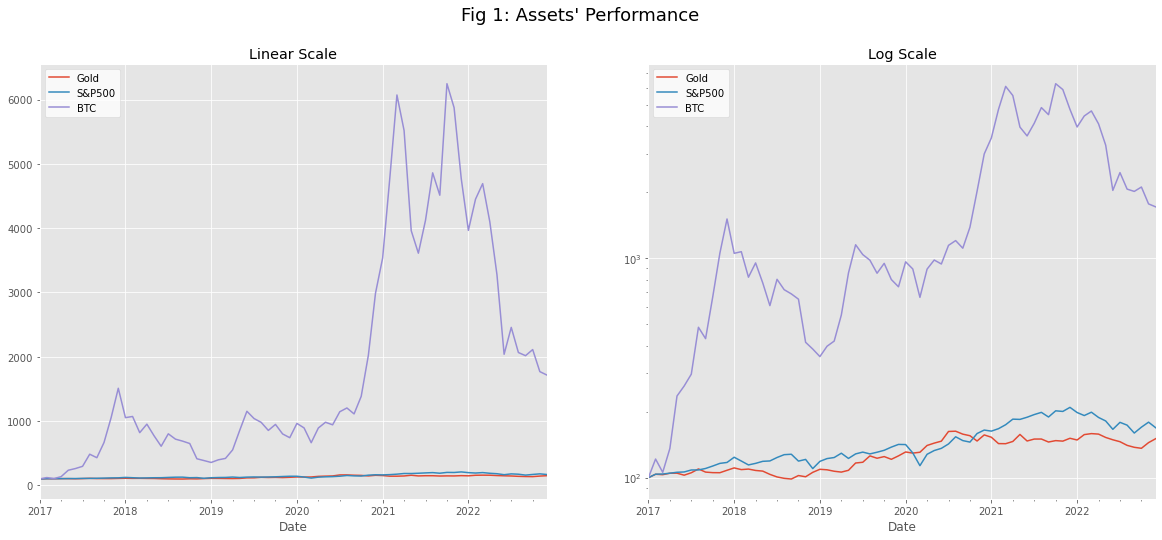

In [26]:
fig, ax=plt.subplots(1,2, figsize=(20,8))

monthly_data_std[['Adj Close_gold', 'Adj Close_sp500', 'Adj Close_btc']].plot(ax=ax[0])
ax[0].set_title('Linear Scale')
ax[0].legend(['Gold', 'S&P500', 'BTC'], facecolor='white', loc=2)

monthly_data_std[['Adj Close_gold', 'Adj Close_sp500', 'Adj Close_btc']].plot(ax=ax[1], logy=True)
ax[1].set_title('Log Scale')
ax[1].legend(['Gold', 'S&P500', 'BTC'], facecolor='white', loc=2)

plt.suptitle("Fig 1: Assets' Performance", size=18)

plt.show()

### Finding 1:
Figure 1 shows the strong outperformance of BTC over the investigated period. Figure 1 also shows that S&P500 performed better than Gold, overall, throughout the investigated period.

## 2.2 Comparison of Asset Returns

### Monthly returns

In [27]:
monthly_data

,Adj Close_gold,Adj Close_sp500,Adj Close_btc
Date,,,
2017-01-31,1208.6,2278.87,970.403015
2017-02-28,1252.6,2363.64,1179.969971
2017-03-31,1247.3,2368.06,1026.430054
2017-04-30,1266.1,2388.77,1317.729980
2017-05-31,1267.0,2411.80,2286.409912
...,...,...,...
2022-08-31,1696.6,3955.00,20049.763670
2022-09-30,1662.4,3640.47,19573.050780
2022-10-31,1645.0,3871.98,20495.773440


In [28]:
monthly_returns=monthly_data.pct_change().dropna()
monthly_returns.columns=['Gold', 'SP500', 'BTC']

In order to analyze the probability of outliers in returns, it is helpful to visualize the historical returns using a histogram

#### Distribution of monthly returns

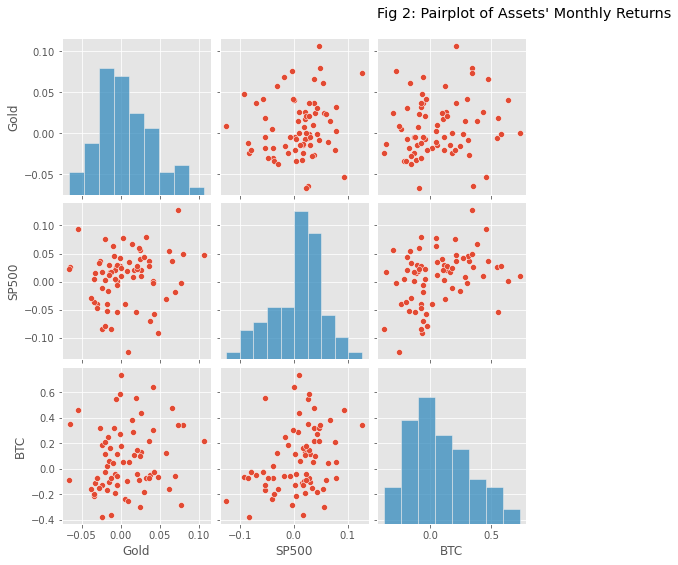

In [29]:
sns.pairplot(monthly_returns, diag_kind='hist')
plt.title("Fig 2: Pairplot of Assets' Monthly Returns", loc='left', pad=350)
plt.show()

In [30]:
# Measure the Skewness
print('Skewness', '\n', monthly_returns.skew(), '\n')

# Measure the Kurtosis
print('Kurtosis','\n', monthly_returns.kurtosis(), '\n')

# Normality test
from scipy.stats import shapiro
monthly_returns

print(f"The normality test result for gold is {shapiro(monthly_returns['Gold'])}")
print(f"The normality test result for s&p500 is {shapiro(monthly_returns['SP500'])}")
print(f"The normality test result for btc is {shapiro(monthly_returns['BTC'])}")
print('\n')
print("The p-values show that among the three assets only the distribution of Bitcoin's monthly return is non-normal")

Skewness 
 Gold     0.515145
SP500   -0.475061
BTC      0.592264
dtype: float64 

Kurtosis 
 Gold     0.170110
SP500    0.368550
BTC     -0.260972
dtype: float64 

The normality test result for gold is ShapiroResult(statistic=0.9736471772193909, pvalue=0.1405627727508545)
The normality test result for s&p500 is ShapiroResult(statistic=0.9706397652626038, pvalue=0.09459386765956879)
The normality test result for btc is ShapiroResult(statistic=0.9605997204780579, pvalue=0.025402264669537544)


The p-values show that among the three assets only the distribution of Bitcoin's monthly return is non-normal


### Annualized total returns

In [31]:
# Calculate period performance
total_return= (monthly_data.iloc[-1]-monthly_data.iloc[0])/monthly_data.iloc[0]
total_return.index=['Gold', 'SP500', 'BTC']
print(total_return, '\n')

# Annualized total returns
annualized_return=((1+total_return)**(12/len(monthly_returns)))-1
annualized_return.index=['Gold', 'SP500', 'BTC']
display(annualized_return)

Gold      0.505461
SP500     0.689118
BTC      16.149928
dtype: float64 



Gold     0.071590
SP500    0.092642
BTC      0.616619
dtype: float64

!!! Another way to calculate the Annualized total return

In [32]:
from PyPortfolioOpt.pypfopt import risk_models, expected_returns, efficient_frontier
expected_returns.mean_historical_return(monthly_data, frequency=12)

Adj Close_gold     0.071590
Adj Close_sp500    0.092642
Adj Close_btc      0.616619
dtype: float64

### Comparison of asset returns

In [33]:
# Annual dataframe for performance comparison
annual_data=monthly_data.resample('Y').last()
annual_return=annual_data.pct_change().mul(100).iloc[1:]

In [34]:
# Plot them
annual_return_long=annual_return.melt(var_name='asset', value_name='return', ignore_index=False)
annual_return_long['year']=annual_return_long.index.year
annual_return_long.reset_index(inplace=True, drop=True)
annual_return_long.asset.replace({'Adj Close_gold':'Gold', 'Adj Close_btc': 'BTC', 'Adj Close_sp500': 'S&P500'}, inplace=True)
annual_return_long.head()

,asset,return,year
0,Gold,-2.143459,2018
1,Gold,18.868810,2019
2,Gold,24.587035,2020
3,Gold,-3.465216,2021
4,Gold,-0.437756,2022


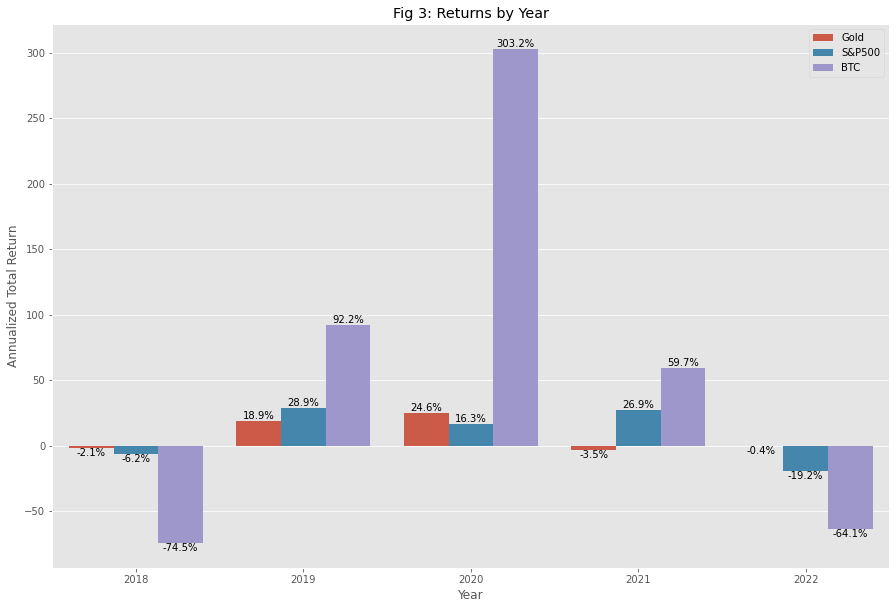

In [35]:
fig, ax=plt.subplots(figsize=(15, 10))
sns.barplot(data=annual_return_long, x='year', y='return', hue='asset', ax=ax)
ax.bar_label(ax.containers[0], fmt='%.1f%%')
ax.bar_label(ax.containers[1], fmt='%.1f%%')
ax.bar_label(ax.containers[2], fmt='%.1f%%')
plt.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Annualized Total Return')
ax.set_title('Fig 3: Returns by Year')
plt.show()

### Finding 2:
As can be seen in Figure 2, BTC outperfored in 2019, 2020, and 2021. On the other hand, BTC had losed a lot in 2018 and 2022

## 2.3 Risks and volatilities

#### 1. Sharpe Ratio

In [36]:
# Calculate the standard deviation and sharpe ratio
# We perform it based on the monthly return
monthly_returns_std_annualized=monthly_returns.std()*np.sqrt(12)
print(monthly_returns_std_annualized)
print('\n')

# Calculate the Sharpe ratio by considering the risk free rate to be 0
assets_sharpe=annualized_return/monthly_returns_std_annualized
print(colored('Sharpe Ratios', color='blue', attrs=['bold']))
print(assets_sharpe)

Gold     0.121653
SP500    0.164035
BTC      0.878700
dtype: float64


Sharpe Ratios
Gold     0.588477
SP500    0.564768
BTC      0.701740
dtype: float64


### Finding 3.1:
The risk-adjusted return, as measured by Sharpe ratio, shows that it is worth the risk to invest on BTC.

#### 2. Maximum drawdown

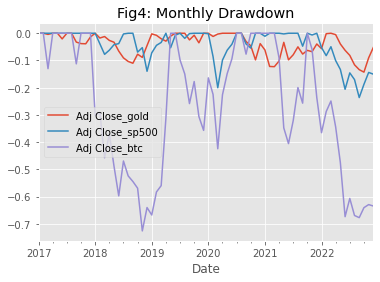

Max monthly drawdown
Adj Close_gold    -0.142827
Adj Close_sp500   -0.236187
Adj Close_btc     -0.725900
dtype: float64


In [37]:
# Calculate the Maximum draw-down: The largest change from the PEAK in one month over a 12-month window
## Calculate the rolling maximum values and monthly draw-downs
roll_max=monthly_data.rolling(window=12, min_periods=1).max()
## Calculate the monthly draw-down from the rolling max
monthly_drawdown=(monthly_data-roll_max)/roll_max
## Calculate the maximum monthly draw-down
max_monthly_drawdown=monthly_drawdown.rolling(window=12, min_periods=1).min()

# plot them
monthly_drawdown.plot()
plt.title('Fig4: Monthly Drawdown')
plt.show()

print(colored('Max monthly drawdown', color='blue', attrs=['bold']))
print(monthly_drawdown.min())

### Finding 3.2:
The maximum drawdown plot shows that there was a significant difference between the monthly drawdown between the three assets, where BTC has the most significant one with around -73% and gold had the lowest with about -14%. This indicates that the investing on BTC is much riskier based on the historical data.

#### 3. Historical VaR

['Gold' 'SP500' 'BTC']
[ -3.60880643  -8.1723587  -26.99333113]


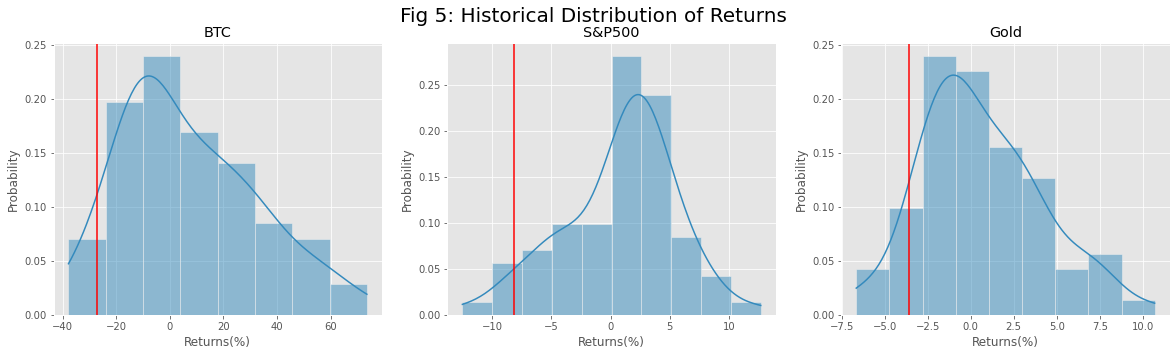

In [38]:
# Calculate the monthly returns in percent
monthly_returns_percent=monthly_returns*100
# Calculate the historical VaR(95)
var_95=np.percentile(monthly_returns_percent,5, axis=0)
print(monthly_returns_percent.columns.values)
print(var_95)

sorted_rets_btc=sorted(monthly_returns_percent['BTC'])
sorted_rets_sp500=sorted(monthly_returns_percent['SP500'])
sorted_rets_gold=sorted(monthly_returns_percent['Gold'])

fig, ax=plt.subplots(1,3, figsize=(20, 5))
sns.histplot(sorted_rets_btc, stat='probability', kde=True, ax=ax[0], label='BTC')
ax[0].axvline(x=var_95[2], color='r')
ax[0].set_title('BTC')
ax[0].set_xlabel('Returns(%)')
sns.histplot(sorted_rets_sp500, stat='probability', kde=True, ax=ax[1], label='S&P500')
ax[1].axvline(x=var_95[1], color='r')
ax[1].set_title('S&P500')
ax[1].set_xlabel('Returns(%)')
sns.histplot(sorted_rets_gold, stat='probability', kde=True, ax=ax[2], label='Gold')
ax[2].axvline(x=var_95[0], color='r')
ax[2].set_title('Gold')
ax[2].set_xlabel('Returns(%)')
plt.suptitle('Fig 5: Historical Distribution of Returns', size=20)
plt.show()

### Finding 3.3:
Acknowledging the shortcomings of volatility as a risk measure (e.g. it captures upside volatility as well, which might actually be desirable), we add the historic Value-at-Risk (VaR) for the 95% confidence interval: Bitcoin's VaR of -30.7% has been more than 3-times that of S&P500, and more than 8-times that of gold.

#### 4. Historical Expected Shortfall CVaR

-33.167613062977146
-9.62316847091721
-5.571244374851613


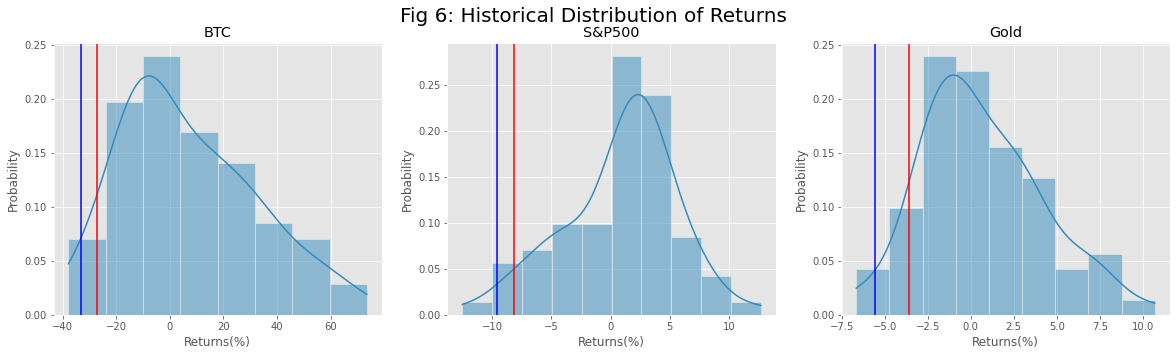

In [39]:
# Calculate CVaR(95)
cvar_95_btc=monthly_returns_percent.loc[monthly_returns_percent.BTC<np.percentile(monthly_returns_percent.BTC,5), 'BTC'].mean()
print(cvar_95_btc)

cvar_95_sp500=monthly_returns_percent.loc[monthly_returns_percent.SP500<np.percentile(monthly_returns_percent.SP500,5), 'SP500'].mean()
print(cvar_95_sp500)

cvar_95_gold=monthly_returns_percent.loc[monthly_returns_percent.Gold<np.percentile(monthly_returns_percent.Gold,5), 'Gold'].mean()
print(cvar_95_gold)

fig, ax=plt.subplots(1,3, figsize=(20, 5))
sns.histplot(sorted_rets_btc, stat='probability', kde=True, ax=ax[0], label='BTC')
ax[0].axvline(x=var_95[2], color='r')
ax[0].axvline(x=cvar_95_btc, color='b')
ax[0].set_title('BTC')
ax[0].set_xlabel('Returns(%)')
sns.histplot(sorted_rets_sp500, stat='probability', kde=True, ax=ax[1], label='S&P500')
ax[1].axvline(x=var_95[1], color='r')
ax[1].axvline(x=cvar_95_sp500, color='b')
ax[1].set_title('S&P500')
ax[1].set_xlabel('Returns(%)')
sns.histplot(sorted_rets_gold, stat='probability', kde=True, ax=ax[2], label='Gold')
ax[2].axvline(x=var_95[0], color='r')
ax[2].axvline(x=cvar_95_gold, color='b')
ax[2].set_title('Gold')
ax[2].set_xlabel('Returns(%)')
plt.suptitle('Fig 6: Historical Distribution of Returns', size=20)
plt.show()

### Finding 3.4:
Expected shortfall measures the mean loss below the VaR and gives another indication of Bitcoin's significant tail risk: -36% for Bitcoin vs. -10% for S&P500 and -6% for gold.

#### Table

In [40]:
Stats=pd.DataFrame({'Annual return (in %)':np.round(annualized_return.values*100,1),
      'Annual volatility (in %)':np.round(monthly_returns_std_annualized.values*100,1),
      'Sharpe ratio':np.round(assets_sharpe.values,1),
      'Max. drawdown (mthly, in %)':np.round(monthly_drawdown.min().values,1),
      'VaR(95) (in %)': np.round(np.array(var_95),1),
      'CVaR(5) / Expected shortfall (in %)': np.round(np.array([cvar_95_gold,cvar_95_sp500,cvar_95_btc]),1)
      }).T
Stats.columns=['Gold', 'SP500', 'BTC']
display(Stats)

,Gold,SP500,BTC
Annual return (in %),7.2,9.3,61.7
Annual volatility (in %),12.2,16.4,87.9
Sharpe ratio,0.6,0.6,0.7
"Max. drawdown (mthly, in %)",-0.1,-0.2,-0.7
VaR(95) (in %),-3.6,-8.2,-27.0
CVaR(5) / Expected shortfall (in %),-5.6,-9.6,-33.2


### Finding 3.5:
Overall, investing on BTC comes with a higher risk compared to S&P500 and gold. But still, the Sharpe ratio shows that is is worth tp take that risk at some level.

## 2.4 Assets Correlation

,Gold,US_CPI,SP500,BTC
Gold,1.00,0.14,0.14,0.03
US_CPI,0.14,1.00,0.33,0.03
SP500,0.14,0.33,1.00,-0.03
BTC,0.03,0.03,-0.03,1.00


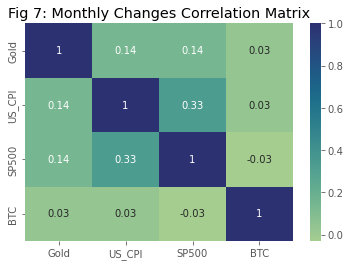

In [41]:
#Calculate correlation matrix on monthly changes
monthly_data_inf.columns=['Gold', 'US_CPI', 'SP500', 'BTC']
cor=monthly_data_inf.pct_change().corr().round(2)
display(cor)
sns.heatmap(cor, annot=True, cmap="crest")
plt.title('Fig 7: Monthly Changes Correlation Matrix')
plt.show()

C:\Users\sd694\AppData\Local\Temp/ipykernel_111604/493131074.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(['{0:.1f}%'.format(x) for x in ax[0].get_xticks()])
C:\Users\sd694\AppData\Local\Temp/ipykernel_111604/493131074.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(['{0:.1f}%'.format(x) for x in ax[0].get_yticks()])
C:\Users\sd694\AppData\Local\Temp/ipykernel_111604/493131074.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(['{0:.1f}%'.format(x) for x in ax[1].get_xticks()])
C:\Users\sd694\AppData\Local\Temp/ipykernel_111604/493131074.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(['{0:.1f}%'.format(x) for x in ax[1].get_yticks()])
C:\Users\sd694\AppData\Local\Temp/ipykernel_111604/493131074.py:11: UserWarning: FixedFormatter should only be used together wit

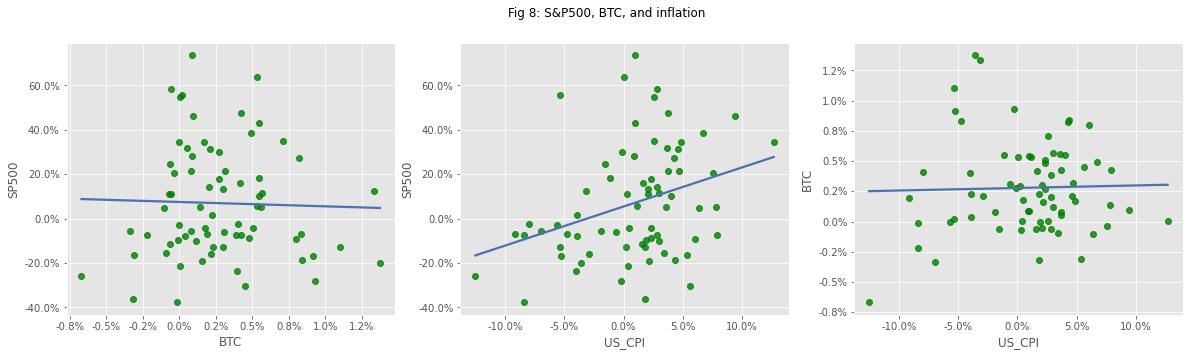

In [55]:
fig, ax=plt.subplots(1,3, figsize=(20,5))
sns.regplot(y='SP500', x='BTC', data=monthly_data_inf.pct_change()*100, ci=None, scatter_kws={'color':'green'}, ax=ax[0])
ax[0].set_xticklabels(['{0:.1f}%'.format(x) for x in ax[0].get_xticks()])
ax[0].set_yticklabels(['{0:.1f}%'.format(x) for x in ax[0].get_yticks()])

sns.regplot(y='SP500', x='US_CPI', data=monthly_data_inf.pct_change()*100, ci=None, scatter_kws={'color':'green'}, ax=ax[1])
ax[1].set_xticklabels(['{0:.1f}%'.format(x) for x in ax[1].get_xticks()])
ax[1].set_yticklabels(['{0:.1f}%'.format(x) for x in ax[1].get_yticks()])

sns.regplot(y='BTC', x='US_CPI', data=monthly_data_inf.pct_change()*100, ci=None, scatter_kws={'color':'green'}, ax=ax[2])
ax[2].set_xticklabels(['{0:.1f}%'.format(x) for x in ax[2].get_xticks()])
ax[2].set_yticklabels(['{0:.1f}%'.format(x) for x in ax[2].get_yticks()])
plt.suptitle('Fig 8: S&P500, BTC, and inflation')

plt.show()

### Finding 4:
The scatterplot of monthly changes (right chart in figure 8) as well as the correlation coefficient of close to zero (figure 7) suggest that there has been no consistent relationship between changes in the price of Bitcoin and inflation since 2017. In itself Bitcoin does not offer good hedging properties against inflation, as it has been largely uncorrelated to changes in the general price level. It seems neither positively nor negatively affected by inflation.

It's also worth noting the positive correlation between the S&P 500 and Bitcoin. A correlation coefficient of 0.3 suggests that Bitcoin tends to move in the same direction as equities, thus offering only limited diversification benefits in a portfolio with equities.

# 3. Capstone2 (Portfolio Optimization)

In [43]:
from PyPortfolioOpt.pypfopt import risk_models, expected_returns, efficient_frontier

In [44]:
# Calculate EXPECTED ANNUALIZED RETURN
monthly_data.columns=['Gold', 'S&P500', 'BTC']
mu=expected_returns.mean_historical_return(monthly_data, frequency=12)
print(mu)

# Calculate the sample variance
Sigma=risk_models.sample_cov(monthly_data)
print(Sigma)

Gold      0.071590
S&P500    0.092642
BTC       0.616619
dtype: float64
            Gold    S&P500        BTC
Gold    0.310788  0.056733   0.315603
S&P500  0.056733  0.565055   0.994363
BTC     0.315603  0.994363  16.214374


C:\Users\sd694\anaconda3.1\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


Start date,2017-01-03
End date,2022-12-29
Total months,62
,Backtest
Annual return,10.869%
Cumulative returns,70.486%
Annual volatility,20.65%
Sharpe ratio,0.60
Calmar ratio,0.32
Stability,0.85
Max drawdown,-33.925%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,33.92,2020-02-19,2020-03-23,2020-08-18,130
1,25.43,2022-01-03,2022-10-12,NaT,NaN
2,19.78,2018-09-20,2018-12-24,2019-04-23,154
3,10.16,2018-01-26,2018-02-08,2018-08-27,152
4,9.60,2020-09-02,2020-09-23,2020-11-13,53


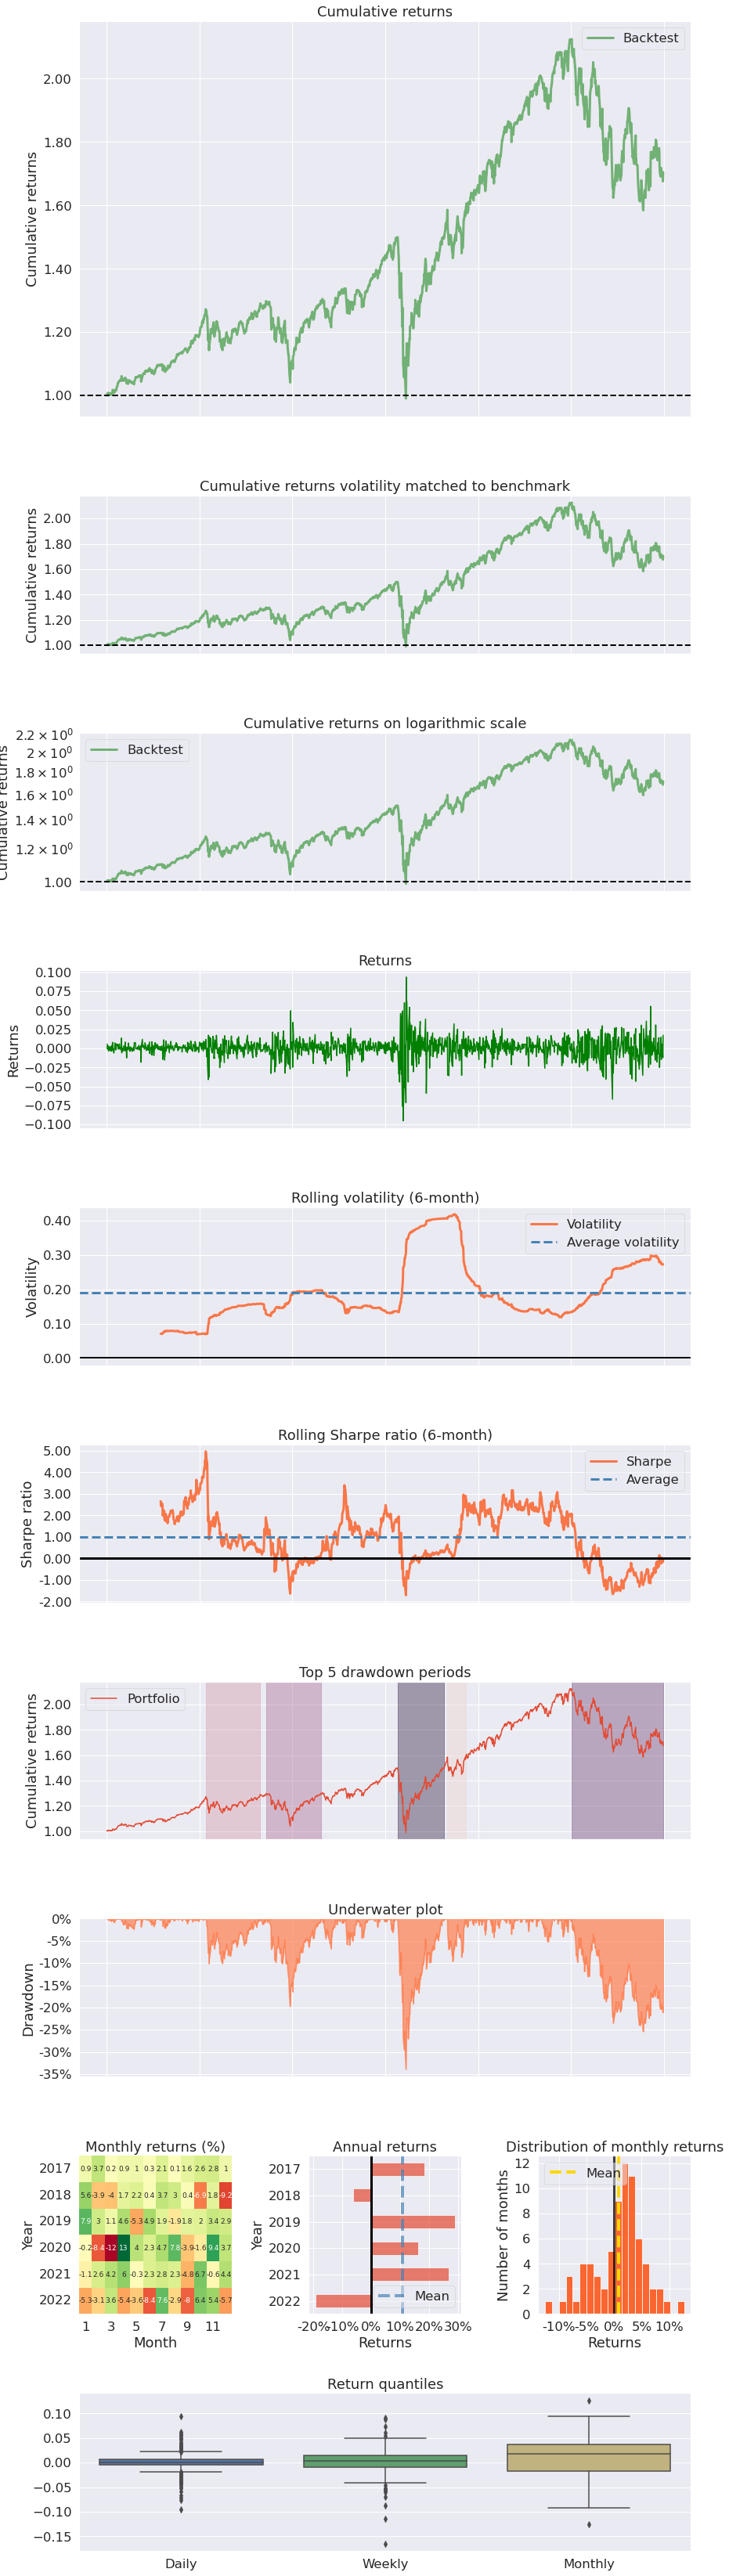

In [45]:
import pyfolio as pf
# The inputs can only be Pthon series. So, this is good with individual stocks only

daily_returns_sp500=daily_data.pct_change()['Adj Close_sp500']
fig_sp500=pf.create_returns_tear_sheet(daily_returns_sp500, return_fig=True)

Start date,2017-01-03
End date,2022-12-29
Total months,62
,Backtest
Annual return,70.836%
Cumulative returns,1494.338%
Annual volatility,83.325%
Sharpe ratio,1.06
Calmar ratio,0.85
Stability,0.68
Max drawdown,-83.036%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,83.04,2017-12-18,2018-12-14,2020-11-30,771
1,76.63,2021-11-08,2022-11-21,NaT,NaN
2,53.06,2021-04-13,2021-07-20,2021-10-19,136
3,32.92,2017-08-31,2017-09-14,2017-10-09,28
4,32.65,2017-01-04,2017-01-11,2017-02-23,37


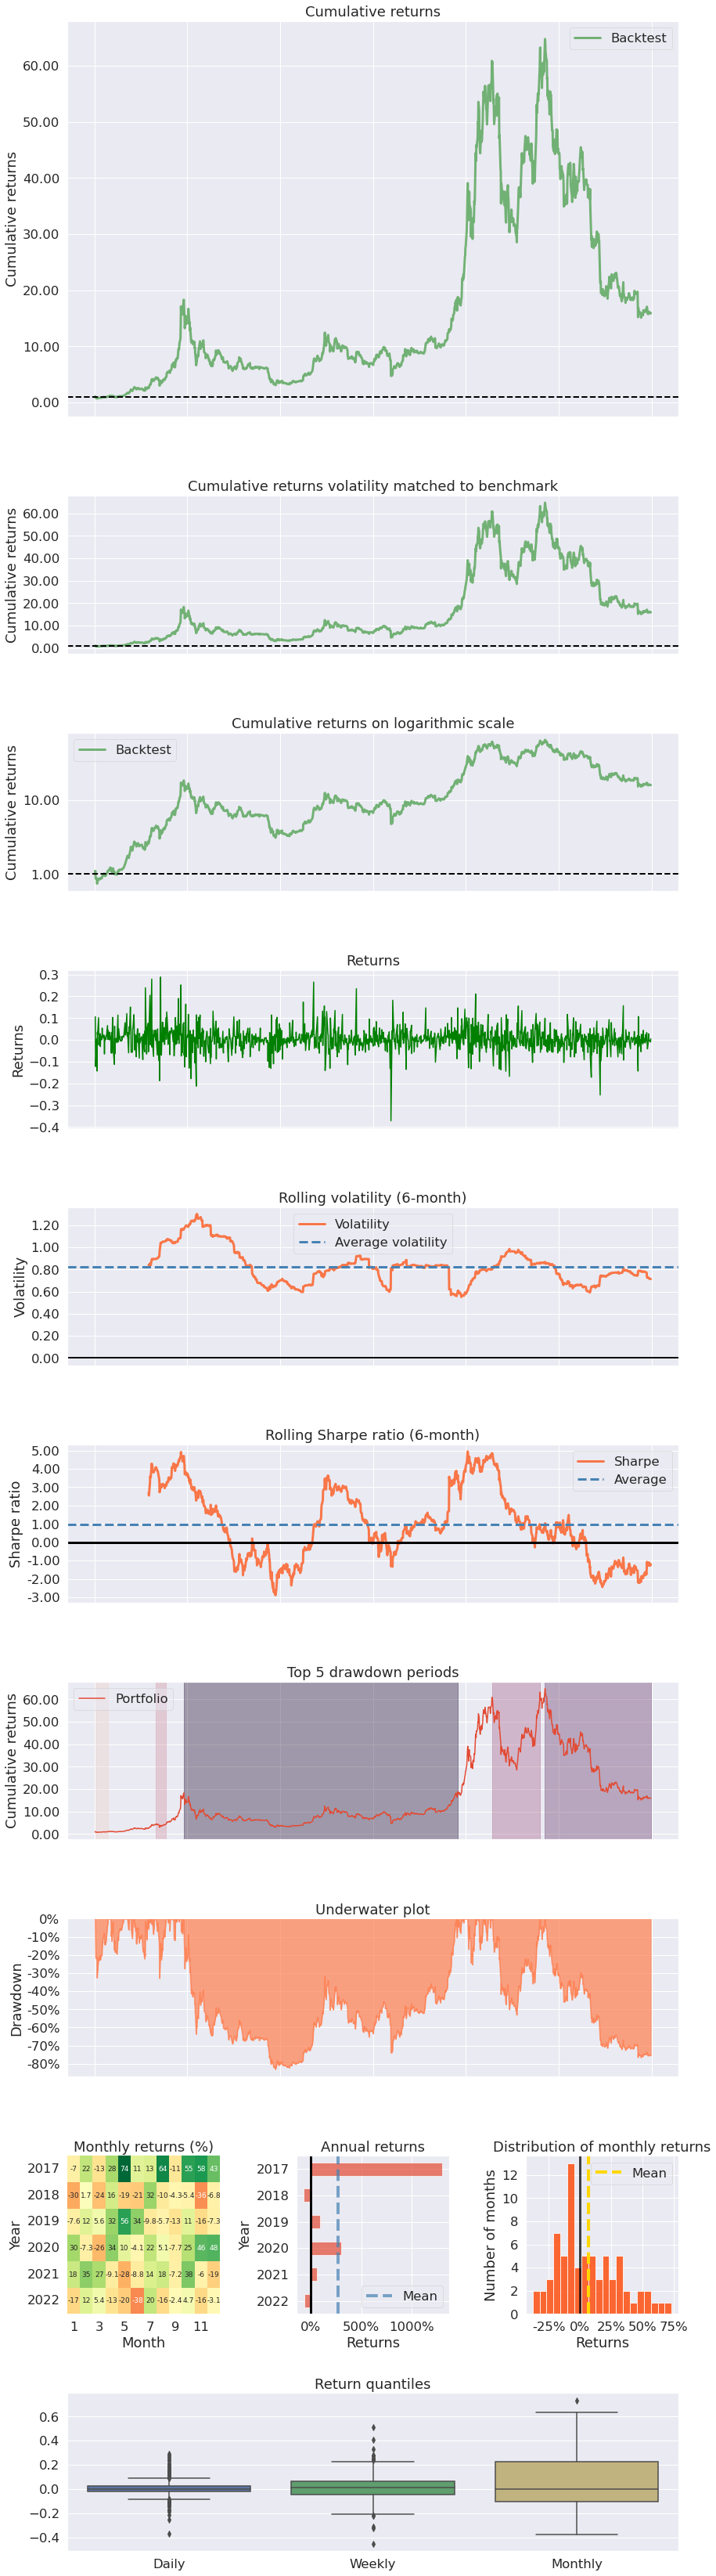

In [46]:
# The inputs can only be Pthon series. So, this is good with individual stocks only

daily_returns_btc=daily_data.pct_change()['Adj Close_btc']
fig_btc=pf.create_returns_tear_sheet(daily_returns_btc, return_fig=True)

### 3.1.1 Efficient Frontier

<AxesSubplot:xlabel='Volatility', ylabel='Return'>

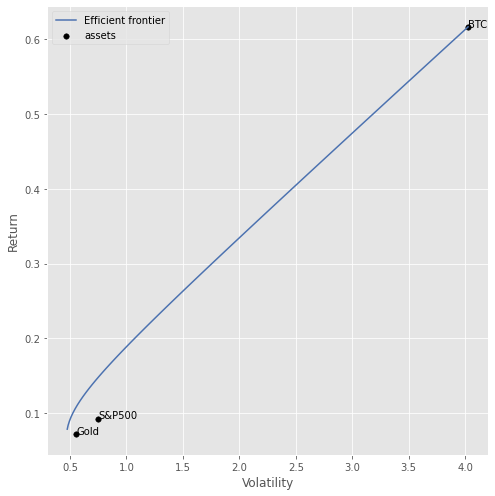

In [47]:
from PyPortfolioOpt.pypfopt import plotting

ef=efficient_frontier.EfficientFrontier(mu, Sigma)
fig, ax=plt.subplots(figsize=(7,7))
plotting.plot_efficient_frontier(ef, show_assets=True, show_tickers=True)

### 3.1.2 Minimum Volatility Portfolio

In [48]:
# Calculate the efficient frontier
ef=efficient_frontier.EfficientFrontier(mu, Sigma)
# Calculate the minimim volatility portfolio
raw_weights_minvol=ef.min_volatility()
cleaned_weights_minvol=ef.clean_weights()
print(cleaned_weights_minvol, ef.portfolio_performance(verbose=True), sep='\n')
annualized_return_minvol=ef.portfolio_performance(verbose=False)

Expected annual return: 7.9%
Annual volatility: 47.6%
Sharpe Ratio: 0.12
OrderedDict([('Gold', 0.66676), ('S&P500', 0.33324), ('BTC', 0.0)])
(0.07860523950807768, 0.4755279484938218, 0.12324247122320109)


### 3.1.3 Maximum Sharpe Ratio Portfolio

In [49]:
# Calculate the efficient frontier
ef=efficient_frontier.EfficientFrontier(mu, Sigma)
# Calculate the max sharpe portfolio
raw_weights_maxsharpe=ef.max_sharpe()
cleaned_weights_maxsharpe=ef.clean_weights()
print(cleaned_weights_maxsharpe, ef.portfolio_performance(verbose=True), sep='\n')
annualized_return_max_sharpe=ef.portfolio_performance(verbose=False)

Expected annual return: 15.5%
Annual volatility: 78.8%
Sharpe Ratio: 0.17
OrderedDict([('Gold', 0.57078), ('S&P500', 0.28804), ('BTC', 0.14118)])
(0.15460228373243273, 0.7884912572717805, 0.17070865718684494)


### 3.1.4 Minimum Volatility Portfolio (with at least 10% investment on BTC)

In [50]:
# Calculate the efficient frontier
ef=efficient_frontier.EfficientFrontier(mu, Sigma, weight_bounds=(.1,1))
# What if we give a minimum weight of 10% to BTC, considering the previous finding from max sharpe
# Based on min volatility
ef.min_volatility()
cleaned_weights_minvolbtc10=ef.clean_weights()
print(cleaned_weights_minvolbtc10, ef.portfolio_performance(verbose=True), sep='\n')
annualized_return_minvolbtc10=ef.portfolio_performance(verbose=False)

Expected annual return: 13.1%
Annual volatility: 66.1%
Sharpe Ratio: 0.17
OrderedDict([('Gold', 0.68912), ('S&P500', 0.21088), ('BTC', 0.1)])
(0.13053235445864667, 0.6608979928549701, 0.16724571061437962)


#### Put them all in a table

In [51]:
opt_portfolio={'Gold_Weight (%)': [round(dict(cleaned_weights_maxsharpe)['Gold']*100, 2),
                                  round(dict(cleaned_weights_minvol)['Gold']*100, 2),
                                  round(dict(cleaned_weights_minvolbtc10)['Gold']*100, 2)],
              'S&P500_Weight (%)': [round(dict(cleaned_weights_maxsharpe)['S&P500']*100, 2),
                                   round(dict(cleaned_weights_minvol)['S&P500']*100, 2),
                                   round(dict(cleaned_weights_minvolbtc10)['S&P500']*100, 2)],
              'BTC_Weight (%)': [round(dict(cleaned_weights_maxsharpe)['BTC']*100, 2),
                                round(dict(cleaned_weights_minvol)['BTC']*100, 2),
                                round(dict(cleaned_weights_minvolbtc10)['BTC']*100, 2)],
               'Annualized_Portfolio_Return (%)': [round(annualized_return_max_sharpe[0]*100, 2),
                                                  round(annualized_return_minvol[0]*100, 2),
                                                  round(annualized_return_minvolbtc10[0]*100, 2)],
               'Annualized_Portfoluo_Volatility (%)': [round(annualized_return_max_sharpe[1]*100, 2),
                                                  round(annualized_return_minvol[1]*100, 2),
                                                  round(annualized_return_minvolbtc10[1]*100, 2)],
               'Portfolio_Sharpe_ratio': [round(annualized_return_max_sharpe[2]*100, 2),
                                                  round(annualized_return_minvol[2]*100, 2),
                                                  round(annualized_return_minvolbtc10[2]*100, 2)]
              }
opt_portfolio=pd.DataFrame(opt_portfolio, index=['Max_Sharpe_Portfolio', 'Min_Volatility_Portfolio', 'Min_Volatility_Portfolio (with at least 10% BTC allocation)']).T
opt_portfolio

,Max_Sharpe_Portfolio,Min_Volatility_Portfolio,Min_Volatility_Portfolio (with at least 10% BTC allocation)
Gold_Weight (%),57.08,66.68,68.91
S&P500_Weight (%),28.80,33.32,21.09
BTC_Weight (%),14.12,0.00,10.00
Annualized_Portfolio_Return (%),15.46,7.86,13.05
Annualized_Portfoluo_Volatility (%),78.85,47.55,66.09
Portfolio_Sharpe_ratio,17.07,12.32,16.72


Efficient frontier optimization requires knowledge of the expected risk Sigma and expected returns mu. The truth is, the mean historic returns, or the historic portfolio variance are not perfect inputs and do not reflect future expected risk and return perfectly. The resulting weights of our optimization problem, would have worked well in the past, but we have no guarantee that it will work well in the future.
A possible improvement is to use exponentially weighted risk and return. It assigns more importance to the most recent data, and thus aims to improve the estimates. This is especially important when we have a volatile asset like BTC.

In [52]:
# Run 1000 random portfolio samples to build risk-return scatter (estimated efficient frontier)
np.random.seed(123)
# Create random weights for the three assets
gold_weights=[]
sp500_weights=[]
btc_weights=[]

for i in range(1000):
    random_weights=np.random.uniform(size=3)
    random_weights_normalized=random_weights/np.sum(random_weights)
    gold_weights.append(random_weights_normalized[0])
    sp500_weights.append(random_weights_normalized[1])
    btc_weights.append(random_weights_normalized[2])

# Create the weights DataFrame
weights=pd.concat([pd.Series(gold_weights, name='Gold'),pd.Series(sp500_weights, name='SP500'),
                   pd.Series(btc_weights, name='BTC')], axis=1)
    
# Calculate the portfolio returns
# All Monthly!
pf_ann_returns=[]
pf_ann_vols=[]


for i in range(len(weights)):
    ann_returns=annualized_return.dot(weights.iloc[i])
    pf_ann_returns.append(ann_returns)
    
    # calculate the portfolio volatilities
    pf_ann_return=monthly_returns.dot(weights.iloc[i])
    pf_vol=np.std(pf_ann_return)
    pf_ann_vol=pf_vol*np.sqrt(12)
    pf_ann_vols.append(pf_ann_vol)
    
# Calculate the Sharpe ratio
pf_sharpe=np.array(pf_ann_returns)/np.array(pf_ann_vols)

In [53]:
annualized_df=pd.concat([annualized_return, monthly_returns_std_annualized], axis=1)
annualized_df.columns=['return', 'volatility']
annualized_df

,return,volatility
Gold,0.071590,0.121653
SP500,0.092642,0.164035
BTC,0.616619,0.878700


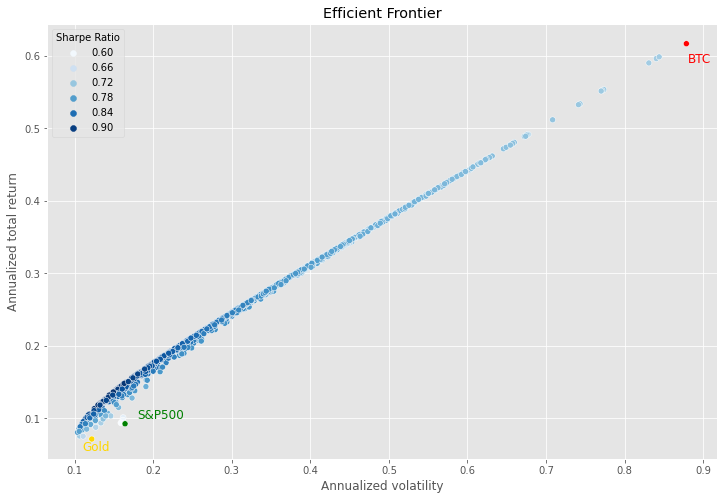

In [57]:
fig, ax=plt.subplots(figsize=(12,8))
sns.scatterplot(x=pf_ann_vols, y=pf_ann_returns, hue=pf_sharpe, palette='Blues')
sns.scatterplot(x='volatility', y='return', data=annualized_df, hue=annualized_df.index, palette=['gold', 'green', 'red'],
               legend=False)
ax.set_xlabel('Annualized volatility')
ax.set_ylabel('Annualized total return')
ax.set_title('Efficient Frontier')
ax.legend(title='Sharpe Ratio')
ax.annotate('Gold', (0.11, 0.055), color='gold', size=12)
ax.annotate('S&P500', (0.18, 0.1), color='green', size=12)
ax.annotate('BTC', (0.88, 0.59), color='red', size=12)
plt.show()

# 4. Preprocessing

We work with the daily data

In [66]:
daily_data=daily_data[['Adj Close_gold', 'Adj Close_sp500', 'Adj Close_btc']]
daily_data.columns=['Gold', 'SP500', 'BTC']
display(daily_data.head())
print(daily_data.shape)

,Gold,SP500,BTC
Date,,,
2017-01-03,1160.4,2257.83,1043.839966
2017-01-04,1163.8,2270.75,1154.729980
2017-01-05,1179.7,2269.00,1013.380005
2017-01-06,1171.9,2276.98,902.200989
2017-01-09,1183.5,2268.90,902.828003


(1303, 3)


In [71]:
# Calculate the daily returns
returns_daily=daily_data.pct_change().dropna()
print(returns_daily.shape)

# We have the monthly returns too but we can recalculate it based on the last business day of the month
returns_monthly=daily_data.resample('BM').last()
print(returns_monthly.shape)

(1302, 3)
(72, 3)


In [72]:
# Find the daily covariances of stocks for each month
months= np.unique(returns_daily.index.month)
years= np.unique(returns_daily.index.year)

from itertools import product

df_lists=[]

for year, month in product(years, months):
    df=returns_daily.loc[(returns_daily.index.year==year)&(returns_daily.index.month==month)]
    df_lists.append(df)

df_lists=[df for df in df_lists if len(df)!=0]
print(len(df_lists))

covariances={}
for i, ind in enumerate(returns_monthly.index):
    covariances[ind]=df_lists[i].cov()

72


In [74]:
# Portfolios
portfolio_returns, portfolio_volatility, portfolio_weights = {}, {}, {}

# Calculate the portfolio performance (daily) at each month
 
for date in sorted(covariances.keys()):
    cov=covariances[date]
    returns_list=[]
    volatilities_list=[]
    weights_list=[]
    
    # Generate 1000 portfolios for each month
    for portfolios in range(1000):
        # Number of weights is equal to the number of stocks
        weights=np.random.uniform(size=3)
        # Normalize the weights
        weights/=np.sum(weights)
        
        # Find the portfolio returns
        returns=returns_monthly.loc[date].dot(weights)
        
        # Find the portfolio volatility
        volatility=np.sqrt(np.dot(weights.T,np.dot(cov, weights)))
        
        # Add the data to the dictionaries
        returns_list.append(returns)
        volatilities_list.append(volatility)
        weights_list.append(weights)
        
        
    portfolio_returns[date]=returns_list
    portfolio_volatility[date]=volatilities_list
    portfolio_weights[date]=weights_list

We need to find the "ideal" portfolios for each date so we can use them as targets for machine learning. We'll loop through each date in portfolio_returns

In [75]:
# Empty dictionaries for sharpe ratios and best sharpe indexes by date
sharpe_ratio, max_sharpe_idxs = {}, {}

for date in portfolio_returns.keys():
    sharpe_ratios_list=[]
    for i, ret in enumerate(portfolio_returns[date]):
        
        # Calculate the Sharpe ratios
        sharpe_ratios_list.append(portfolio_returns[date][i]/portfolio_volatility[date][i])
        
    sharpe_ratio[date]=sharpe_ratios_list
    # Get the index of the best sharpe ratio for each date
    max_sharpe_idxs[date]=np.argmax(sharpe_ratio[date])

We will now work towards creating some features to be able to predict our ideal portfolios. We will simply use the price movement as a feature. To do this we will create a daily exponentially-weighted moving average (EWMA), then resample that to the monthly timeframe. Finally, we'll shift the monthly moving average of price one month in the future, so we can use it as a feature for predicting future portfolios.

In [76]:
# Calculate exponentially-weighted moving average of daily returns
ewma_daily=returns_daily.ewm(span=30).mean()

# Resample daily returns to last business day of the month with the last day for that month
ewma_monthly= ewma_daily.resample('BM').last()
display(ewma_monthly.head())

,Gold,SP500,BTC
Date,,,
2017-01-31,0.001781,0.000279,0.004096
2017-02-28,0.001770,0.001365,0.010023
2017-03-31,0.000908,0.000467,-0.003734
2017-04-28,0.000585,0.000864,0.008589
2017-05-31,0.000904,0.000770,0.022894


In [77]:
# Shift ewma for the month by 1 month forward so we can use it as a feature for future predictions 
ewma_monthly= ewma_monthly.shift(1).dropna()
display(ewma_monthly.head())

,Gold,SP500,BTC
Date,,,
2017-02-28,0.001781,0.000279,0.004096
2017-03-31,0.001770,0.001365,0.010023
2017-04-28,0.000908,0.000467,-0.003734
2017-05-31,0.000585,0.000864,0.008589
2017-06-30,0.000904,0.000770,0.022894


To use machine learning to pick the best portfolio, we need to generate features and targets. Our features are the exponentially weighted moving averages of prices. Our targets will be the best portfolios we found from the highest Sharpe ratio.

### 4.1 Create the target and features

In [78]:
# Targets will be the best set of weights for the portfolio best on the Sharpe ratio

targets, features= [], []

# Create features from price history and targets as ideal portfolio
for date, ewma in ewma_monthly.iterrows():
    
    # Get the index of the best Sharpe ratio
    best_idx=max_sharpe_idxs[date]
    # Get the ideal portfolio weights based on the best Sharpe ratio.
    targets.append(portfolio_weights[date][best_idx])
    
    # Create the features
    features.append(ewma) # add ewma to features

targets=np.array(targets)
features=np.array(features)
print(targets[-5:])

[[0.41079004 0.00728888 0.58192109]
 [0.74631618 0.0227702  0.23091363]
 [0.04165193 0.00147251 0.95687556]
 [0.64875632 0.0038371  0.34740659]
 [0.07683261 0.00845438 0.91471302]]


### 4.2 Split the  data into training set and test set

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(features, targets, test_size=.25, random_state=123)